In [310]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import vis_cam_custom
import importlib
import math
import generate_cams
import heapq
importlib.reload(vis_cam_custom)
importlib.reload(generate_cams)

<module 'generate_cams' from 'C:\\Users\\Linus\\Desktop\\mmclassification\\CAMs\\generate_cams.py'>

In [250]:
def generatePlotsDict(imgDict, height=10,width=10,ncols=5,figsize=[15,15]):

    # prep (x,y) for extra plotting
    xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
    ys = np.abs(np.sin(xs))           # absolute of sine

    # ax enables access to manipulate each of subplots
    ax = []
    fig = plt.figure(figsize=(figsize))
    nrows = len(imgDict)//ncols+1
    
    for index, key in enumerate(imgDict):
        #img = np.random.randint(10, size=(height,width))
        # create subplot and append to ax
        ax.append( fig.add_subplot(nrows, ncols, index+1) )
        ax[-1].set_title(f'{key.split(".")[0]}')  # set title
        plt.imshow(imgDict[key])
        #plt.imshow(img)

    plt.tight_layout()
    plt.show()

In [258]:
def generatePlotsList(imgList, height=10,width=10,ncols=5,figsize=[15,15]):

    # prep (x,y) for extra plotting
    xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
    ys = np.abs(np.sin(xs))           # absolute of sine

    # ax enables access to manipulate each of subplots
    ax = []
    fig = plt.figure(figsize=(figsize))
    nrows = len(imgList)//ncols+1
    
    for index, img in enumerate(imgList):
        #img = np.random.randint(10, size=(height,width))
        # create subplot and append to ax
        ax.append( fig.add_subplot(nrows, ncols, index+1) )
        ax[-1].set_title(f'{index}')  # set title
        plt.imshow(img)
        #plt.imshow(img)

    plt.tight_layout()
    plt.show()

In [280]:
def generateRandomBox(width,height,imgWidth=224,imgHeight=224, keyval=1, base=None):
    if base is None:
        base = np.zeros((imgHeight,imgWidth))
    box = np.array([keyval]*width*height).reshape(height, width)

    x, y = np.random.randint(0,[imgWidth-width,imgHeight-height])
    base[y:y+height, x:x+width] = box
    return base

In [281]:
def generateBoxMasks(box, width=224,height=224, boxCount=None):
    if not boxCount:
        boxCount = (int)(np.max(box))
    boxes = [np.zeros((height,width)) for _ in range(boxCount)] 
    for i in range(boxCount):
        boxes[i][box==i+1] = 1
    return boxes
        

In [47]:
path = "C:/Users/Linus/Desktop/mmclassification/CAMs/out/cams_Acura_Acura_ILX.npz"
index = 'Acura_Acura_ILX_7e68078389331f.jpg'

In [3]:
cams = np.load(path)

In [48]:
cams[index].shape

(224, 224)

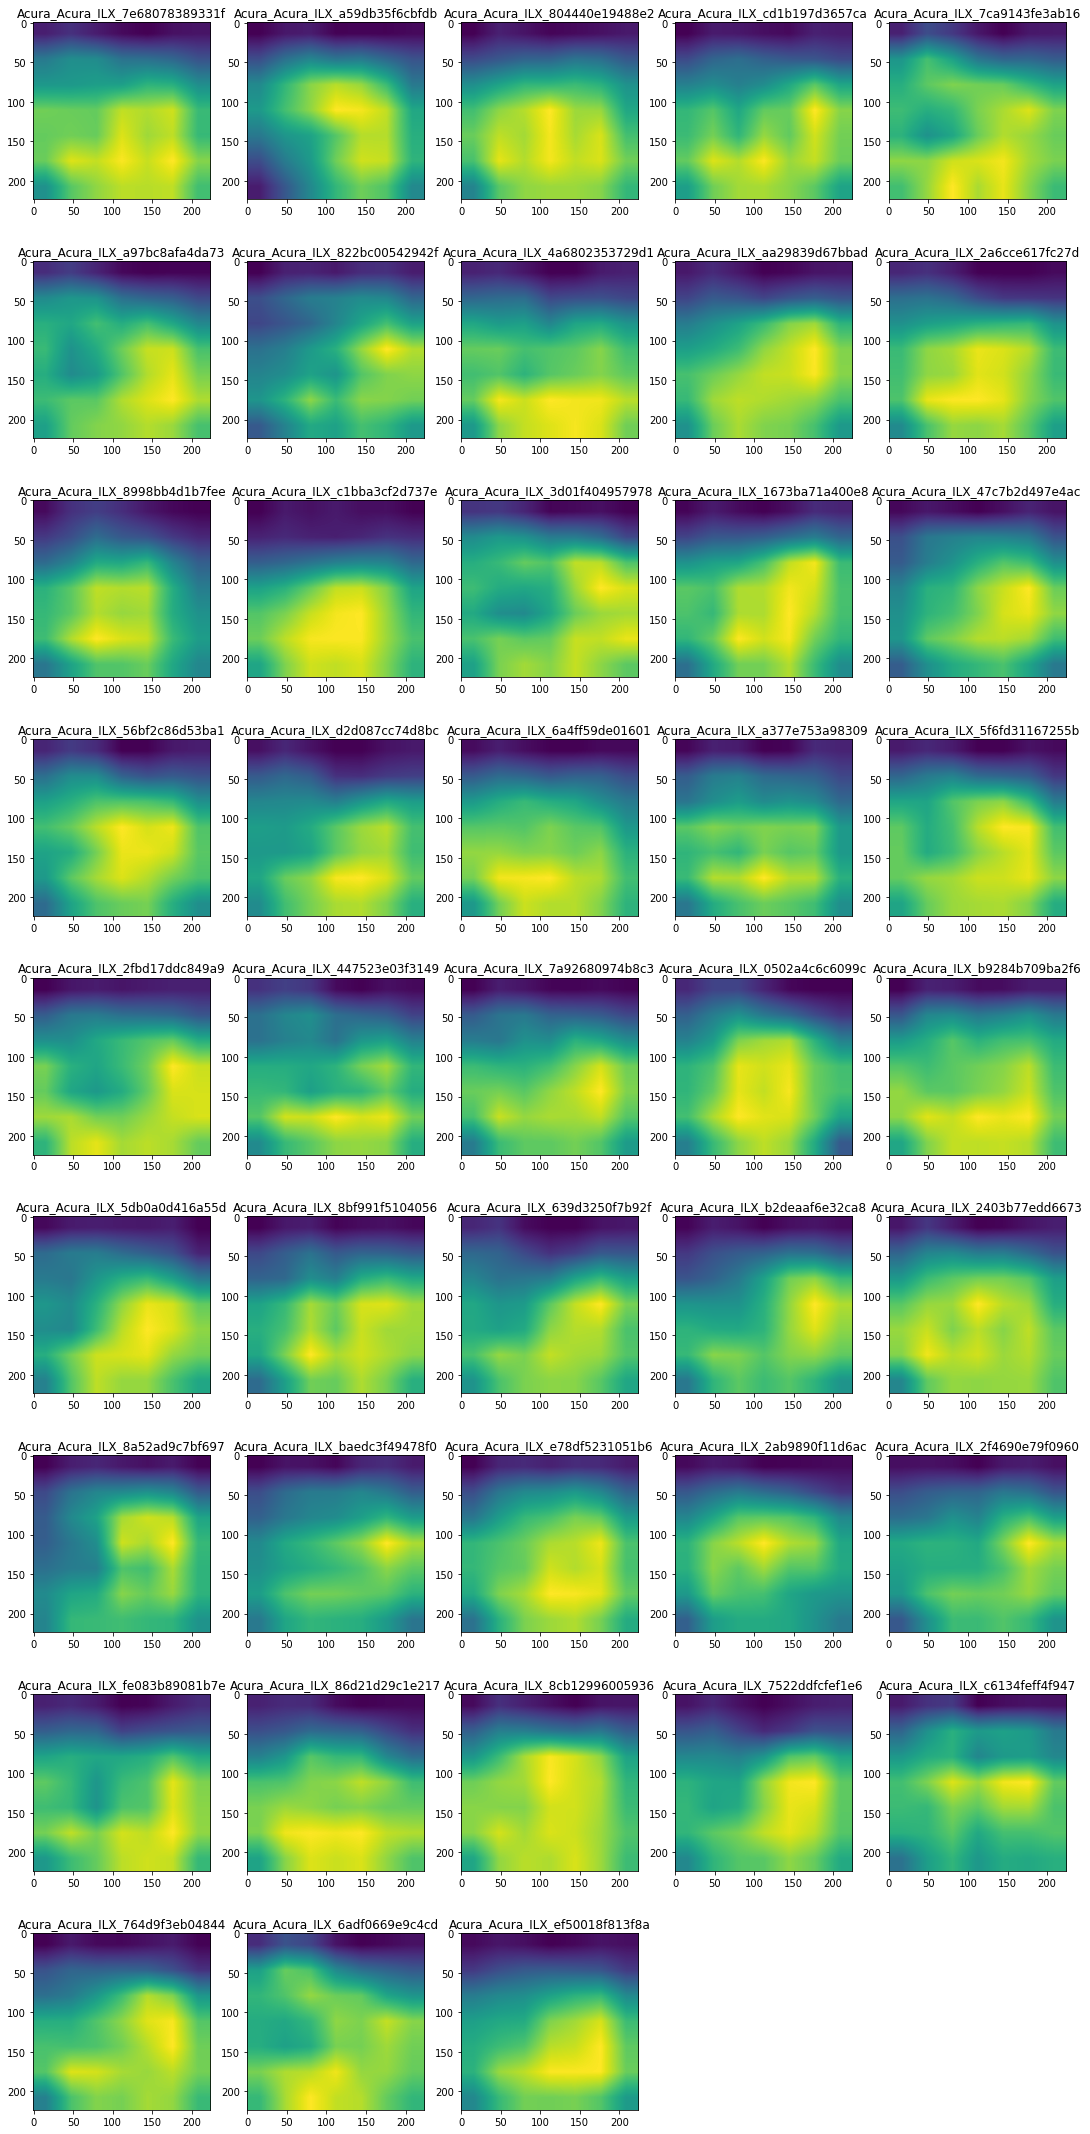

In [251]:
generatePlotsDict(cams,height=244,width=244,ncols=5, figsize=[15,30])

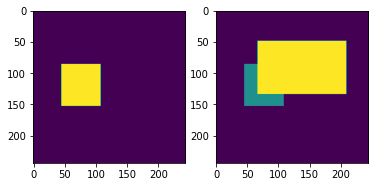

In [185]:
box = generateRandomBox(*np.random.randint(30,150,size=2))
figure = plt.figure()
figure.add_subplot(1,2,1)
plt.imshow(box)
box2 = generateRandomBox(*np.random.randint(30,150,size=2), keyval=2, base=box)
figure.add_subplot(1,2,2)
plt.imshow(box2)

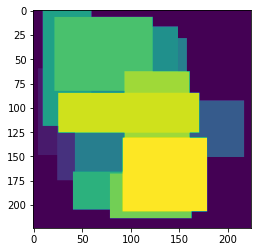

In [283]:
box = generateRandomBox(*np.random.randint(30,150,size=2))
for i in range(2,15):
    box = generateRandomBox(*np.random.randint(30,150,size=2), keyval=i, base=box)
plt.imshow(box)

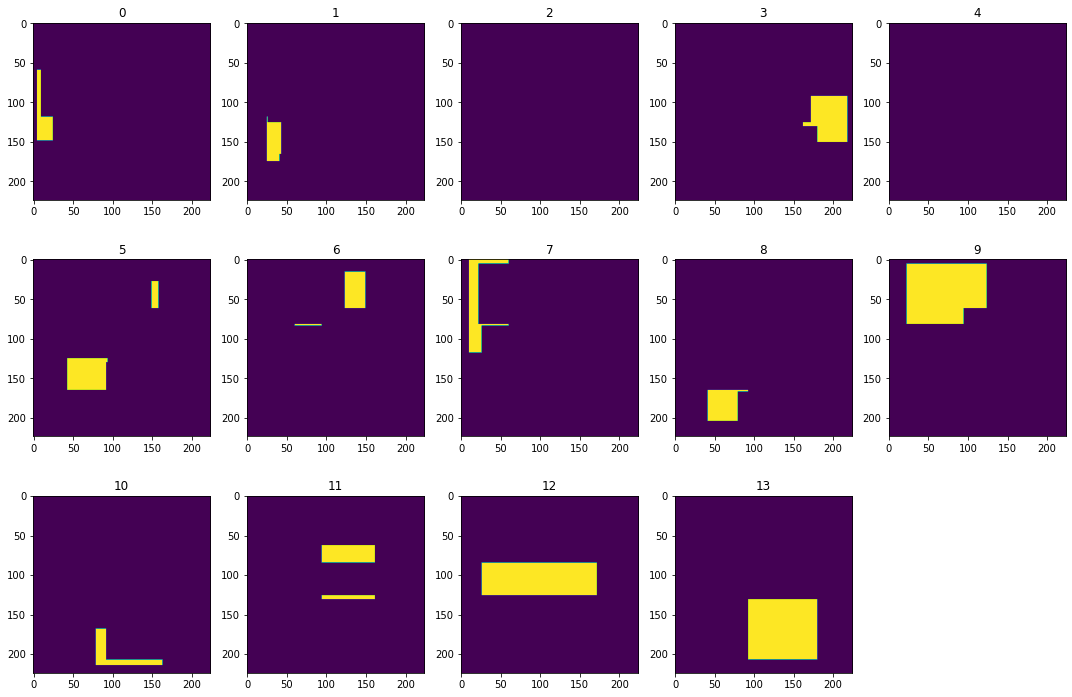

In [284]:
boxes = generateBoxMasks(box=box)
generatePlotsList(boxes,height=224,width=224,ncols=5, figsize=[15,10])

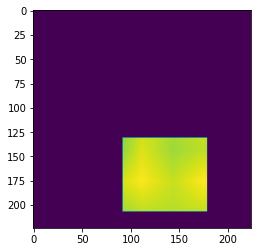

In [287]:
plt.imshow(cams[index]*boxes[13])

In [289]:
maskedCams = [cams[index]*box for box in boxes]

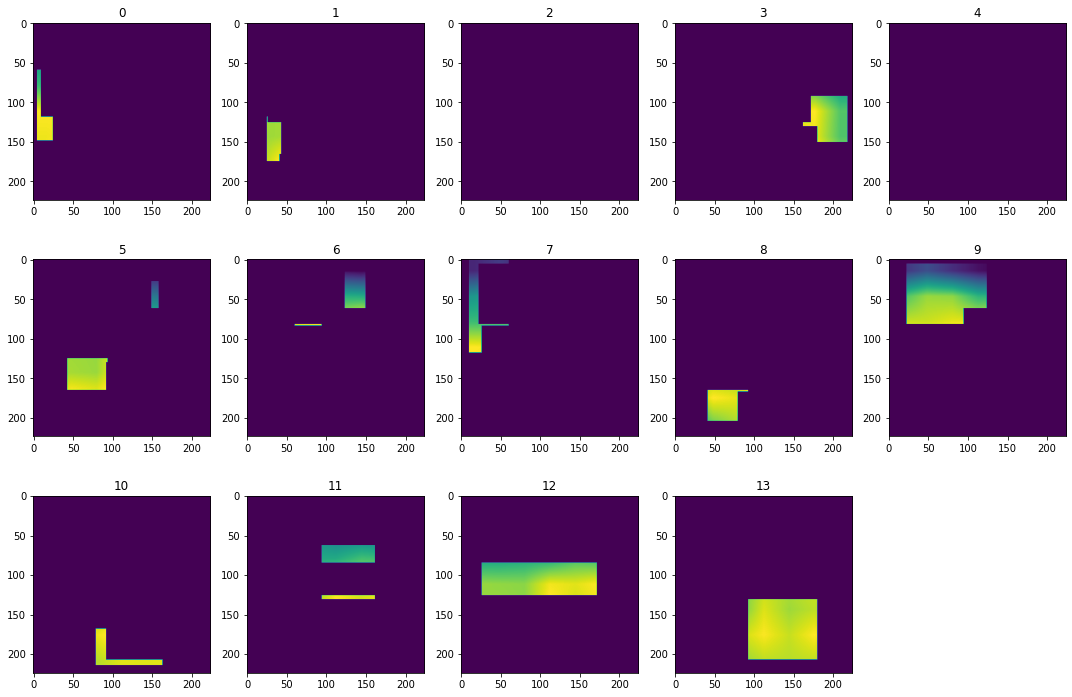

In [290]:
generatePlotsList(maskedCams,height=224,width=224,ncols=5, figsize=[15,10])

In [303]:
camsTotal = cams[index].sum()
camsProp = np.sum(maskedCams, axis=(1,2))/camsTotal

In [304]:
camsProp

array([0.02075027, 0.0225115 , 0.        , 0.06239671, 0.        ,
       0.05457757, 0.0117553 , 0.02519217, 0.0423049 , 0.07793759,
       0.03123647, 0.0363334 , 0.14641215, 0.19580562])

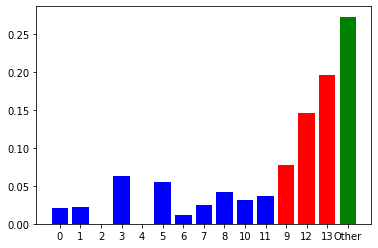

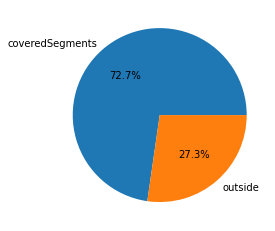

In [359]:
largest = heapq.nlargest(3,camsProp)
defaultMask = camsProp < np.min(largest)
topMask = camsProp >= np.min(largest)
Segment = np.arange(len(camsProp)).astype(str)
plt.bar(Segment[defaultMask], camsProp[defaultMask], color='blue')
plt.bar(Segment[topMask], camsProp[topMask], color='red')
plt.bar('Other', (camsTotal-np.sum(maskedCams))/camsTotal, color='green')
plt.show()
labels = 'coveredSegments', 'outside'
sizes = [np.sum(maskedCams), camsTotal-np.sum(maskedCams)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [345]:
camsTotal

31068.268

In [346]:
np.sum(maskedCams)

22593.2684886083